In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,NaN,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['RM'].value_counts()

RM
5.713    3
6.417    3
6.229    3
6.167    3
6.405    3
        ..
5.599    1
6.047    1
6.172    1
6.012    1
6.430    1
Name: count, Length: 442, dtype: int64

In [6]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.282834,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703543,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

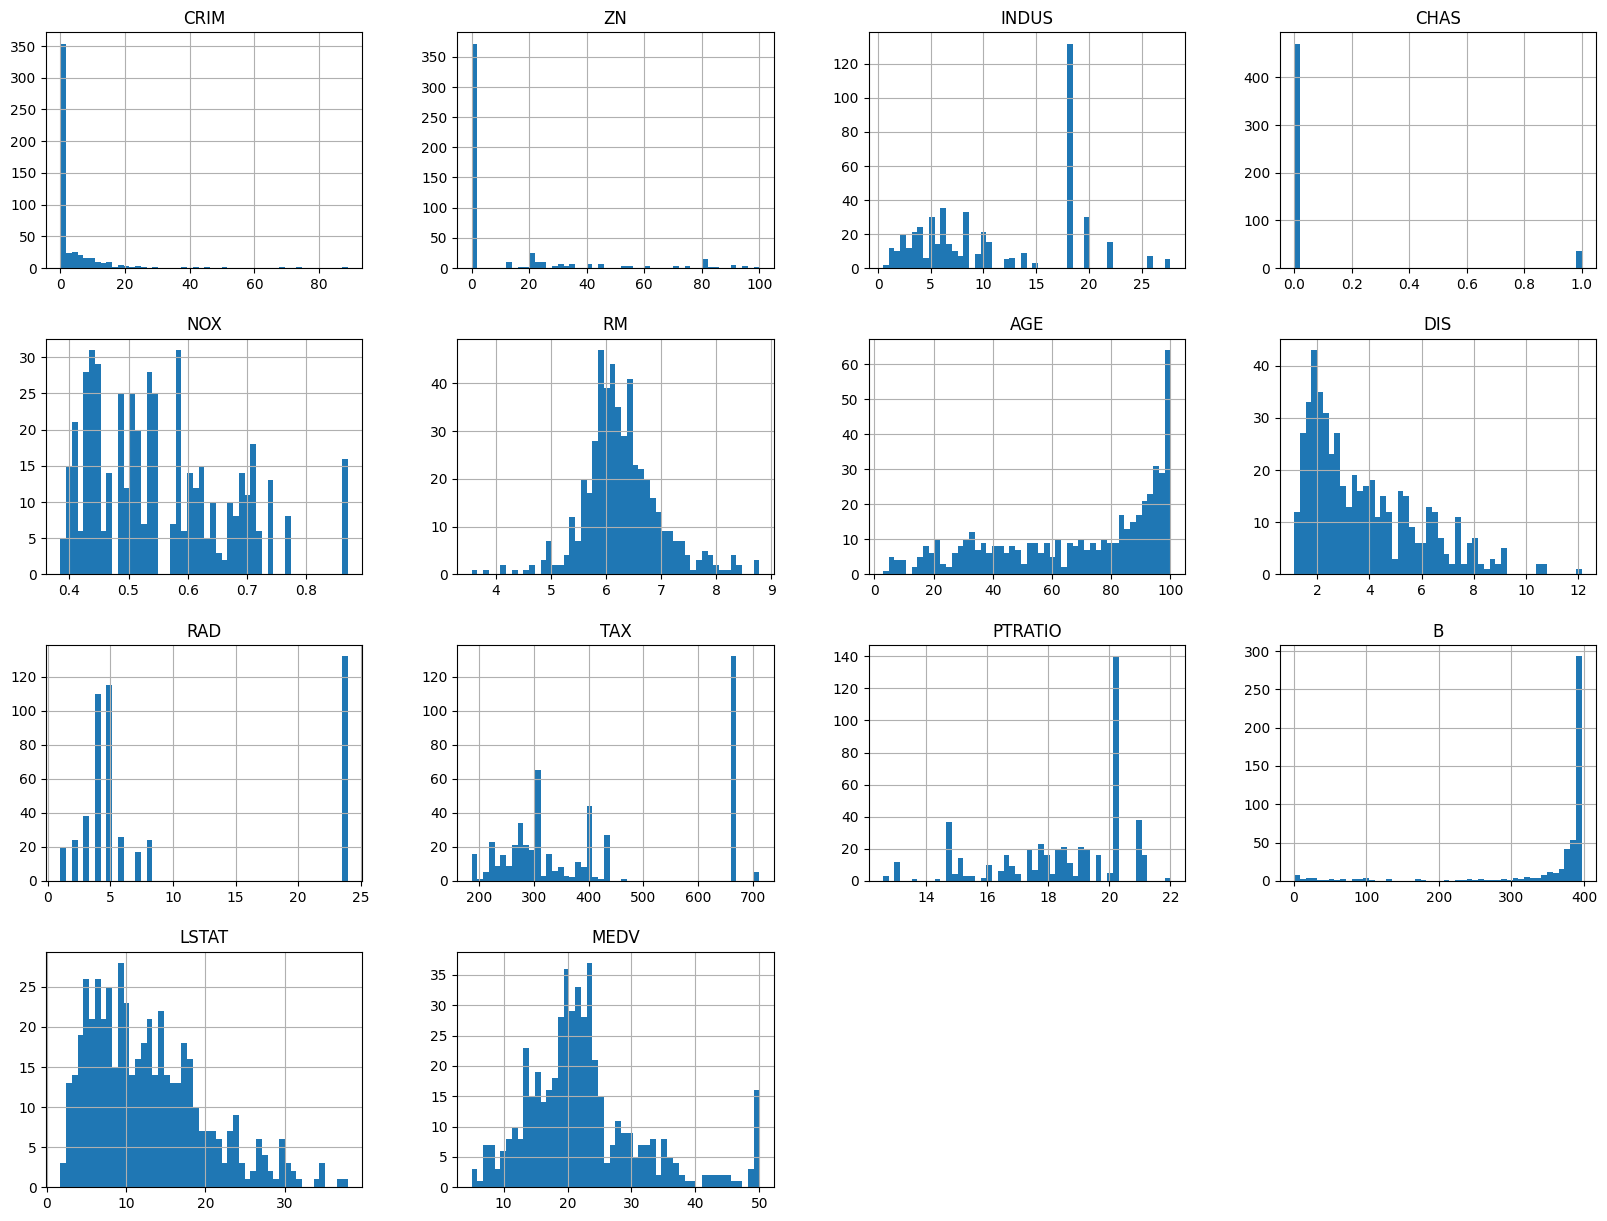

In [10]:
housing.hist(bins=50, figsize=(20, 15))

## Train Test Splitting

In [11]:
# not used because we already have a function for this in sklearn
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [13]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       100 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [17]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [18]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [19]:
#95/7, 376/28

## Looking for correlations

In [20]:
housing = strat_train_set.copy()

In [21]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677546
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

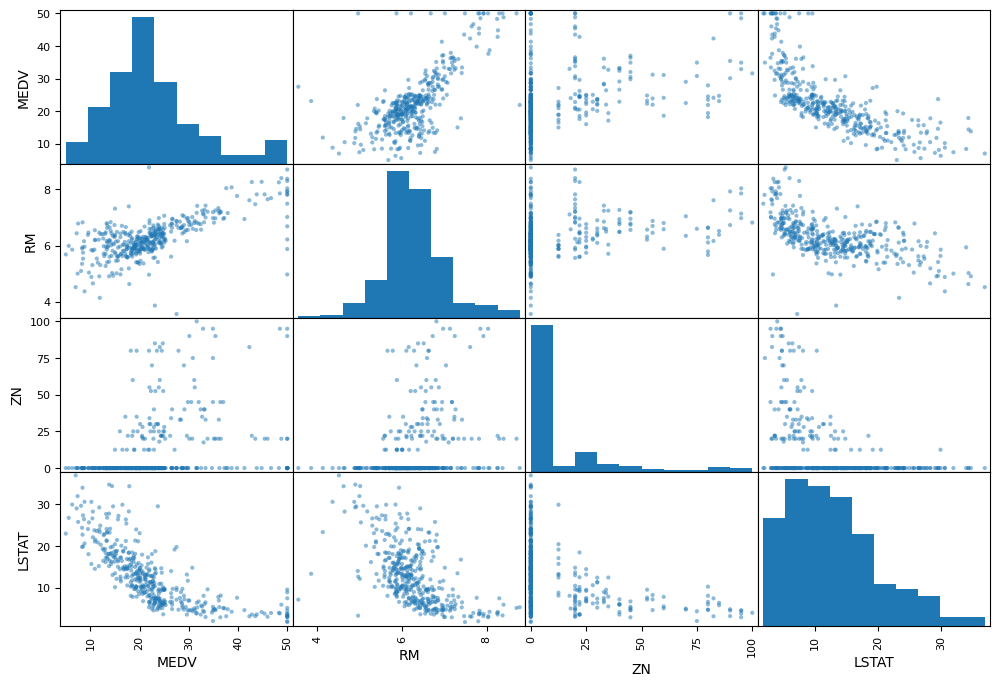

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

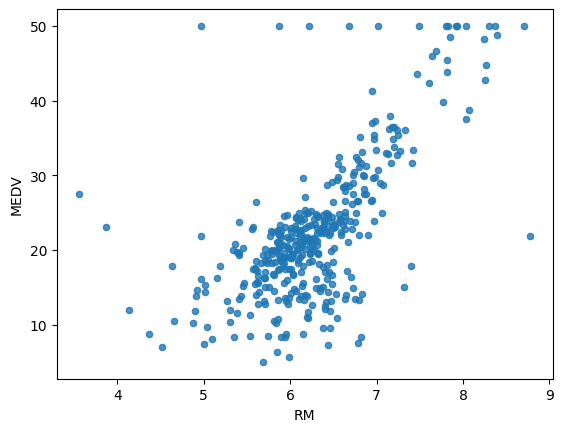

In [23]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying attribute combinations

In [24]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [25]:
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [26]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [27]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677546
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.522354
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

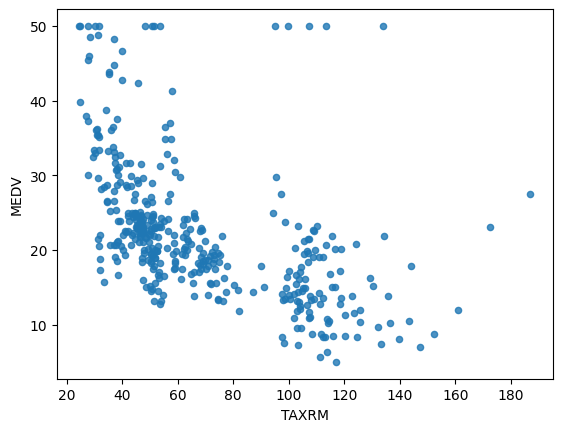

In [28]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [29]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [30]:
a = housing.dropna(subset=["RM"]) 
a.shape

(401, 13)

In [31]:
housing.drop("RM", axis=1).shape

(404, 12)

In [32]:
median = housing["RM"].median()
median

np.float64(6.209)

In [33]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [34]:
housing.shape

(404, 13)

In [35]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.275392,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.713190,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [38]:
X = imputer.transform(housing)

In [39]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [40]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.274899,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710553,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Creating a pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [42]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [43]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]], shape=(404, 13))

## Selecting desired model

In [44]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(housing_num_tr, housing_labels)

LinearRegression()

In [45]:
some_data = housing.iloc[:5]

In [46]:
some_labels = housing_labels.iloc[:5]

In [47]:
prepared_data = my_pipeline.transform(some_data)

In [48]:
model1.predict(prepared_data)

array([24.03548403, 27.30057167, 20.53163427, 25.08826716, 23.80306832])

In [49]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = model1.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [51]:
rmse

np.float64(4.8413122621637985)

In [52]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(housing_num_tr, housing_labels)

DecisionTreeRegressor()

In [53]:
housing_predictions = model2.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [54]:
rmse

np.float64(0.0)

In [55]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [56]:
housing_predictions = model3.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [57]:
rmse

np.float64(1.1506151809160414)

## Cross Validation

In [58]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(model1, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores1 = np.sqrt(-scores1)

In [59]:
rmse_scores1

array([4.17827825, 4.30731203, 5.07576951, 3.83912016, 5.35992892,
       4.4057684 , 7.44964001, 5.57519659, 4.13628845, 6.05006031])

In [60]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(model2, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores2 = np.sqrt(-scores2)

In [61]:
rmse_scores2

array([3.9617993 , 5.86687684, 5.29997699, 4.12085712, 3.60114565,
       4.92267712, 6.79810635, 3.77806167, 3.34178096, 3.39963233])

In [62]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(model3, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores3 = np.sqrt(-scores3)

In [63]:
rmse_scores3

array([2.90174363, 2.91679852, 4.55505833, 2.59103314, 3.18941152,
       2.79057009, 4.51519886, 3.38583168, 3.11600873, 3.31056999])

In [64]:
def print_scores(scores1):
    print("Scores:", scores1)
    print("Mean: ", scores1.mean())
    print("Standard deviation: ", scores1.std())

In [65]:
print_scores(rmse_scores1)

Scores: [4.17827825 4.30731203 5.07576951 3.83912016 5.35992892 4.4057684
 7.44964001 5.57519659 4.13628845 6.05006031]
Mean:  5.03773626212499
Standard deviation:  1.0562697416102598


In [66]:
def print_scores(scores2):
    print("Scores:", scores2)
    print("Mean: ", scores2.mean())
    print("Standard deviation: ", scores2.std())

In [67]:
print_scores(rmse_scores2)

Scores: [3.9617993  5.86687684 5.29997699 4.12085712 3.60114565 4.92267712
 6.79810635 3.77806167 3.34178096 3.39963233]
Mean:  4.509091434111284
Standard deviation:  1.1082536470236932


In [68]:
def print_scores(scores3):
    print("Scores:", scores3)
    print("Mean: ", scores3.mean())
    print("Standard deviation: ", scores3.std())

In [69]:
print_scores(rmse_scores3)

Scores: [2.90174363 2.91679852 4.55505833 2.59103314 3.18941152 2.79057009
 4.51519886 3.38583168 3.11600873 3.31056999]
Mean:  3.327222448436096
Standard deviation:  0.6454172926655154


We choose Random Forest Regressor as the final model.

In [70]:
from joblib import dump, load
dump(model3, 'House_pred.joblib') 

['House_pred.joblib']

## Testing using RMSE

In [71]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model3 .predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test)) 

In [72]:
final_rmse

np.float64(2.9190257439970693)

In [73]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23517663, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Solving using MAE

In [74]:
from sklearn.metrics import mean_absolute_error
housing_predictions = model1.predict(housing_num_tr)
mae = mean_absolute_error(housing_labels, housing_predictions)
mae 

3.415508207174324

In [75]:
housing_predictions = model2.predict(housing_num_tr)
mae = mean_absolute_error(housing_labels, housing_predictions)
mae 

0.0

In [76]:
housing_predictions = model3.predict(housing_num_tr)
mae = mean_absolute_error(housing_labels, housing_predictions)
mae 

0.8156559405940582

In [77]:
scores1 = cross_val_score(model1, housing_num_tr, housing_labels, scoring="neg_mean_absolute_error", cv=10)
mae_scores1 = -scores1  
mae_scores1

array([3.06595477, 3.33236762, 3.15458658, 2.87401046, 3.9498168 ,
       3.48400491, 4.51111062, 4.29092403, 3.20585922, 3.96056518])

In [78]:
scores2 = cross_val_score(model2, housing_num_tr, housing_labels, scoring="neg_mean_absolute_error", cv=10)
mae_scores2 = -scores2  
mae_scores2

array([3.13902439, 3.56097561, 3.73658537, 2.98780488, 2.9975    ,
       3.4825    , 3.7275    , 3.1675    , 2.4925    , 2.5575    ])

In [79]:
scores3 = cross_val_score(model3, housing_num_tr, housing_labels, scoring="neg_mean_absolute_error", cv=10)
mae_scores3 = -scores3  
mae_scores3

array([2.13465854, 2.10563415, 2.75058537, 1.86104878, 2.532275  ,
       1.985175  , 2.973075  , 2.68695   , 2.09      , 2.376475  ])

In [80]:
def print_scores(scores1):
    print("Scores:", scores1)
    print("Mean: ", scores1.mean())
    print("Standard deviation: ", scores1.std())

In [81]:
print_scores(mae_scores1)

Scores: [3.06595477 3.33236762 3.15458658 2.87401046 3.9498168  3.48400491
 4.51111062 4.29092403 3.20585922 3.96056518]
Mean:  3.5829200192810866
Standard deviation:  0.5299101356242162


In [82]:
def print_scores(scores2):
    print("Scores:", scores2)
    print("Mean: ", scores2.mean())
    print("Standard deviation: ", scores2.std())

In [83]:
print_scores(mae_scores2)

Scores: [3.13902439 3.56097561 3.73658537 2.98780488 2.9975     3.4825
 3.7275     3.1675     2.4925     2.5575    ]
Mean:  3.1849390243902436
Standard deviation:  0.4216860456060806


In [84]:
def print_scores(scores3):
    print("Scores:", scores3)
    print("Mean: ", scores3.mean())
    print("Standard deviation: ", scores3.std())

In [85]:
print_scores(mae_scores3)

Scores: [2.13465854 2.10563415 2.75058537 1.86104878 2.532275   1.985175
 2.973075   2.68695    2.09       2.376475  ]
Mean:  2.3495876829268285
Standard deviation:  0.3524211949705505


## Testing using MAE

In [86]:
from sklearn.metrics import mean_absolute_error
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model3.predict(X_test_prepared)
final_mae = mean_absolute_error(Y_test, final_predictions)

In [87]:
final_mae

2.0649215686274505

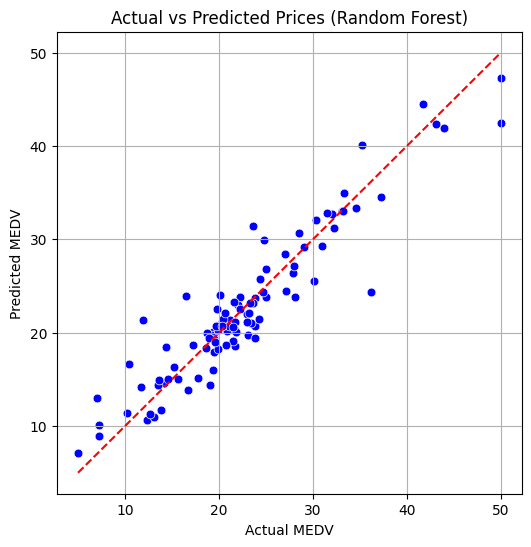

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example for Random Forest
# Replace model3 with model2 or model1 for DT or LR respectively

# Step 1: Make predictions on the test set
final_predictions_rf = model3.predict(X_test_prepared)

# Step 2: Plot Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=Y_test, y=final_predictions_rf, color='blue', s=40)

# Step 3: Add a diagonal line for reference (perfect predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')

# Step 4: Add labels and title
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.grid(True)
plt.show()

In [89]:
!pip install seaborn

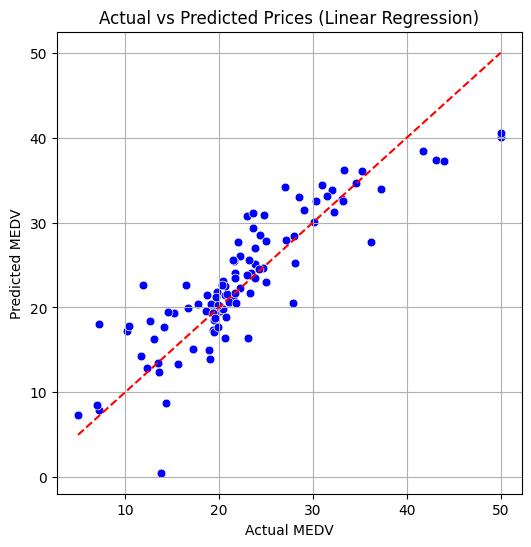

In [100]:
# For Linear Regression
final_predictions_lr = model1.predict(X_test_prepared)
plt.figure(figsize=(6, 6))
sns.scatterplot(x=Y_test, y=final_predictions_lr, color='blue', s=40)

# Step 3: Add a diagonal line for reference (perfect predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')

# Step 4: Add labels and title
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.grid(True)
plt.show()

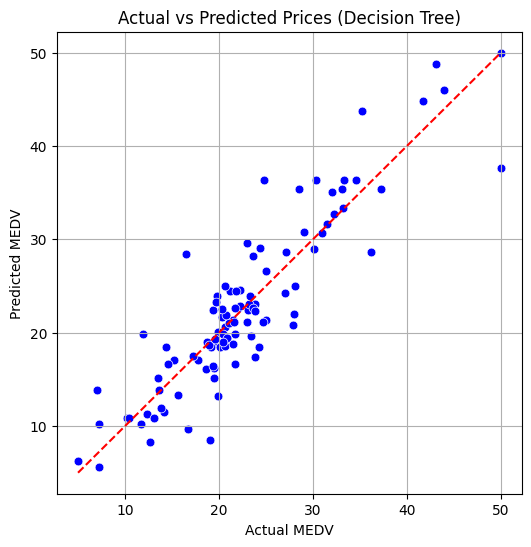

In [98]:
# For Decision Tree
final_predictions_dt = model2.predict(X_test_prepared)
plt.figure(figsize=(6, 6))
sns.scatterplot(x=Y_test, y=final_predictions_dt, color='blue', s=40)

# Step 3: Add a diagonal line for reference (perfect predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')

# Step 4: Add labels and title
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Prices (Decision Tree)")
plt.grid(True)
plt.show()

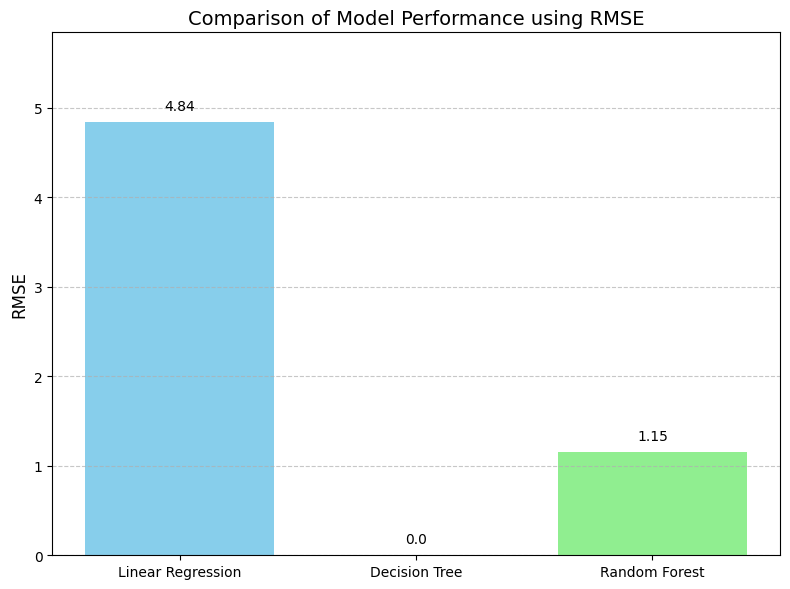

In [104]:
# Model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest']

# RMSE values from your evaluation (replace these with your actual results)
rmse_values = [4.841, 0.0, 1.150]

# Bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(models, rmse_values, color=['skyblue', 'green', 'lightgreen'])

# Annotate bars with RMSE values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.1, round(yval, 2), ha='center', va='bottom')

# Labels and title
plt.title('Comparison of Model Performance using RMSE', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.ylim(0, max(rmse_values) + 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

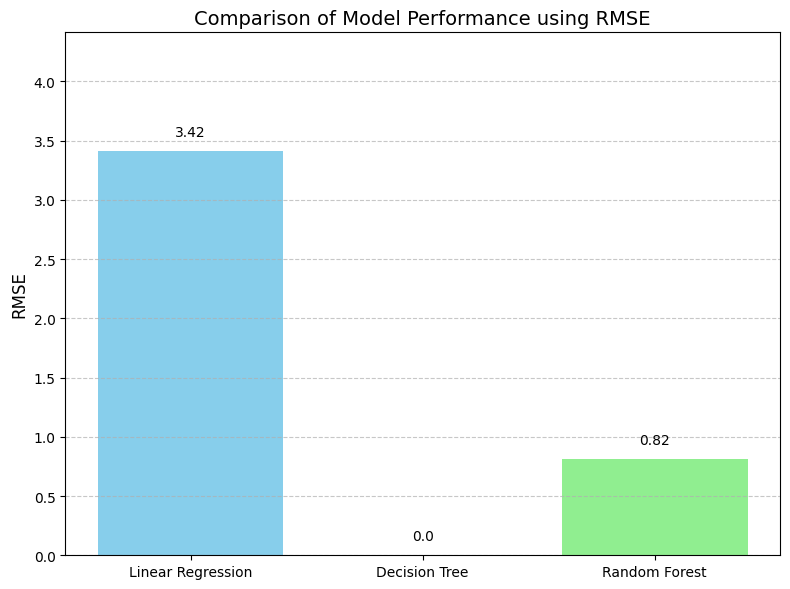

In [105]:
# Model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest']

# RMSE values from your evaluation (replace these with your actual results)
rmse_values = [3.415, 0.0, 0.815]

# Bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(models, rmse_values, color=['skyblue', 'green', 'lightgreen'])

# Annotate bars with RMSE values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.1, round(yval, 2), ha='center', va='bottom')

# Labels and title
plt.title('Comparison of Model Performance using RMSE', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.ylim(0, max(rmse_values) + 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()